# SQLAlchemy, Sqlite, and Dates

## Setup

In [2]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///../Resources/dow.sqlite", echo=False)

In [6]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

In [7]:
inspector = inspect(engine)
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


## Reflect and query dates

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [9]:
session = Session(engine)

## Analysis

Analyze the Average prices (open, high, low, close) for all stocks in the Month of May

In [23]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name

sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]

may_summary = session.query(*sel).filter(func.strftime("%m", Dow.date) == "05").group_by(Dow.stock).order_by(Dow.stock).all()

In [45]:
may_df = pd.DataFrame(columns=["Stock","Avg Open","Avg High","Avg Low", "Avg Close"], data=may_summary).set_index("Stock")

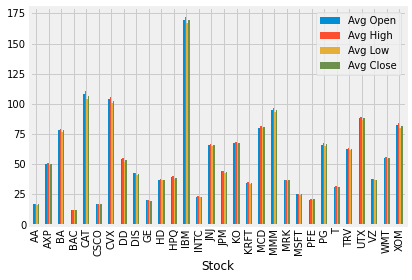

In [48]:
# Plot the Results in a Matplotlib bar chart
may_df.plot.bar()
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

### Bonus
Calculate the high-low peak-to-peak (PTP) values for `IBM` stock after `2011-05-31`. 
* Note: high-low PTP is calculated using `high_price` - `low_price`
* Use a DateTime.date object in the query filter
* Use list comprehension to create a list of dictionaries from the query results
* Create a dataframe from the list of dictionaries
* Use the `boxplot()` method on the dataframe to plot PTP distribution statistics

In [ ]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011
# YOUR CODE HERE

In [ ]:
# Load the list comprehension rows into a dataframe, set the index to the date, and plot the PTPs
# YOUR CODE HERE